# Abstract

The Baltimore City Police Department is tasked everyday to stop crime in one of the most crime ridden cities in the country.  In this project I will analyze some crime data for Baltimore in attempt to predict what weapon was used in a crime given the other features of the crime such as time of day, time of year, inside/outside, description, and so on.  In the introduction section I will give more background information about the knowledge necessary for understanding the goals.  Following, in the research questions section I state the question we are trying to answer and give a goal for the accuracy to reach.  Next, I show the data cleaning process I used as well as some exploratory data analysis for some stats and trends in the data.  Then I jump into the machine learning portion, first with a feature engineering section to prepare the data further, followed by the modeling section containing the models.  I will then interpret and discuss the results followed by a section stating the conclusions and summary of the findings.  Lastly, I state some of the limitations of this work and suggest some future strategies that might be able to help improve our results.  References and contributions listed at the bottom.

# Introduction

For this project, I chose to perform data analysis on Baltimore City crime data.  The motivation in analyzing this data is to find patterns and trends in crimes as well as run predictive analytics so that we may learn more information and be better prepared to stop crime.  This can be useful in numerous ways.  For example, say police are expecting a crime in a certain location at a certain time, and know a general description of it - they could also try to predict what weapon will be used in the crime to know what they will be up against and be prepared.  If there is a crime expected and a firearm is likely to be used, police should be ready for a gun fight.  Secondly, say the crime already happened and the police officer recieved a call giving a general location, and description - when enroute to the crime and arriving on the scene it would be helpful for them to know what kind of weapon they are up against.  This information can inform the officer of whther or not the suspect is likely to be armed, and what kind of person they are going to have to deal with so that they may be best prepared for the situation.

The data:
To perform this analysis, I will use a data set named "BPD Part 1 Victim Based Crime Data" from Open Baltimore (Here: https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij/data).  This data is updated every Monday, with a 9 day time lag to minimize changes to the data as records move throughout the BPD review process.  I exported this data as a CSV file and began the cleaning of it from there.  The data contains 16 columns and 313,634 rows.  One limitation is that a lot of the weapons in the dataset are null, since for the purpose of this project our goal is to predict the type of weapon used, we will drop those rows with a null weapon.  These cases where the weapon is null include cases where it is fairly obvious that no weapon is really applicable such as a car theft where there was no intervention between people, just the car stolen; or a burglary where the suspect broke in somewhere and robbed the place without a weapon or any interaction with a victim.  For the purpose of this project we will focus on the victim based crimes where a weapon was used.  This leaves us with 66908 crimes to base our model on which should still be plenty.  Another limitation is that the weapon may be classified as only one of 4 categories: HANDS, KNIFE, FIREARM, OTHER.  With this, we can only predict one of those from this dataset and the OTHER category may not be too useful for an officer to know about.  But the cases of knowing when a FIREARM / KNIFE / HANDS are used would be very useful it is still a very important prediction as that informaiton is vital to saving lives on the streets of Baltimore.


# Research Question

The question at hand here is if we can we predict what weapon will be used in a particular victim based crime.  This would benefit police officers by either knowing before the crime happens what to be on the lookout for/prepared for or after the fact for when they arrive on the scene to know what to expect ]/ be prepared for.

Based on a dummy model, if we simply predicted that every crime was commited with a FIREARM??? we would have an accuracy score of: ACCURACY_SCORE_HERE!!

So, we will make it our goal to beat that accuracy score with out model.  Can we predict what weapon will be used in a particular crime with a higher accuracy rate than ACCURACY_SCORE_HERE!!

# Data Cleaning

Cleaning the data:
The following are the steps, techniques and assumptions I used to clean the data:
1.  I use pandas read_csv to read the csv file which had a 'utf-8' encoding.
2.  I look at the column names to analyze which columns are good for answering our questions, and which contain duplicate information/ are not valuable and can be gotten rid of.  The techniques I use here are the pandas dataframe info() and head() functions to gain a better understanding of the data.  I also scrolled through the csv in excel to eyball the data quickly to get a better understanding of it.
3. I use the rename function with a lamda function to replace the spaces and slashes with an empty string to get rid of them.  
4. After looking at head(), I see that it looks like the TotalIncidents column is always 1, so I count the number of values in that column equal to one and turns out, it is the same number as there are rows (313,634), meaning they are all 1, which tells us nothing and this column may be dropped.  
5. It looks like the contents of the vri_name1 column are contained in the District column.  That, combined with the fact that there are only 37,056 non-null values in the vri_name1 column leads me to the decision that it can be dropped for simplicity.  This should be noted that our results will not have any analysis of the vri_name1 column (some are slightly different than the district and this content will not be represented, we deem it unimportant for the time being but it could come into play later. 
6. After looking at the output of the info() function, it is determined that the column, Location1, has 0 non-null values and can obviously be dropped.
7. I drop those 3 columns (Location1, vri_name1, TotalIncidents) using the pandas drop function.
8. Now that the columns are set, I look at handling the missing values and inconsistencies. The data has 313,634 entries.  I look at the output of the pandas info() function to gain more information from about the numbers of null values.  The columns of CrimeTime, Location, InsideOutside, Weapon, Post, District, Neighborhood, Longitude, Latitude, Premise all contain null values.  
    * The weapon column only had 66,908 non-null values, with so many nulls, I made the assumption that a null weapon means no weapon was used and filled them with 'None' using the pandas fillna function.
    * CrimeTime and Post each had small amounts of null values, and there is not a great way to fill them without introducing bias to the data.  For example, filling the missing times with midnight would increase the number of crimes at midnight to more than they should be when doing time analysis.  So, any row with a null for CrimeTime or Post, I drop.
    * The remaining columns of Location, InsideOutside, Neighborhood, and Premise are all strings and we can easily replace their nulls with 'Unknown' so that we can keep those data rows, and at the same time keep in mind that there are unknowns when doing the analysis.
9. I clean other inconsistencies such as FIRE to FIREARM and I to Inside, O to Outside.
10. I write the cleaned pandas dataframe to a csv file to be loaded from the explore workbook.  For the code of this cleaning, please see the load_and_clean workbook.

In [36]:
#imports
import pandas as pd

In [37]:
#read in the raw csv file
crime_data = pd.read_csv("../data/BPD_crime_data.csv", encoding= 'utf-8')
crime_data.head(2) #check to ensure it worked
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313634 entries, 0 to 313633
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        313634 non-null  object 
 1   CrimeTime        313609 non-null  object 
 2   CrimeCode        313634 non-null  object 
 3   Location         312020 non-null  object 
 4   Description      313634 non-null  object 
 5   Inside/Outside   275344 non-null  object 
 6   Weapon           66908 non-null   object 
 7   Post             312916 non-null  float64
 8   District         312916 non-null  object 
 9   Neighborhood     312899 non-null  object 
 10  Longitude        313404 non-null  float64
 11  Latitude         313404 non-null  float64
 12  Location 1       0 non-null       float64
 13  Premise          275094 non-null  object 
 14  vri_name1        37056 non-null   object 
 15  Total Incidents  313634 non-null  int64  
dtypes: float64(4), int64(1), object(11)
me

In [38]:
#Next we will begin the cleaning process

#Let's look to see what columns we can get rid of

#set the column names to be camelCase convention, contert the Inside/Outside column name
#simplest one-liner to just replace the / with ""
crime_data_correct_columns = crime_data.copy()
crime_data_correct_columns = crime_data_correct_columns.rename(columns= lambda x: x.replace("/", ""));
crime_data_correct_columns = crime_data_correct_columns.rename(columns= lambda x: x.replace(" ", ""));

#First, we notice that the 'Total Incidents' column is always 1, which tells us nothing so we get rid of it
#proven here by seeing the count is equal to the number of rows
print("Number of 1's in total incidents column: ", crime_data_correct_columns[crime_data_correct_columns.TotalIncidents == 1].count())

#Let's see if the info on the data:
crime_data.info()

#We notice that the 'Location 1' column has 0 non-null values, so that column can also be dropped
#It looks like the contents of the vri_name1 column are contained in the District column.  That, combined with the
#fact that there are only 37,056 non-null values in the vri_name1 column leads me to the decision that it can be
#dropped for simplicity.  This should be noted that our results will not have any analysis of the vri_name1 column
#(some are slightly different than the district and this content will not be represented, we deem it unimportant 
#for the time being but it could come into play later. 


#Drop those 3 columns
crime_data_correct_columns = crime_data_correct_columns.drop(columns=['TotalIncidents', 'vri_name1', 'Location1'])

crime_data_correct_columns.head(2)
crime_data_correct_columns.info()

Number of 1's in total incidents column:  CrimeDate         313634
CrimeTime         313609
CrimeCode         313634
Location          312020
Description       313634
InsideOutside     275344
Weapon             66908
Post              312916
District          312916
Neighborhood      312899
Longitude         313404
Latitude          313404
Location1              0
Premise           275094
vri_name1          37056
TotalIncidents    313634
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313634 entries, 0 to 313633
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        313634 non-null  object 
 1   CrimeTime        313609 non-null  object 
 2   CrimeCode        313634 non-null  object 
 3   Location         312020 non-null  object 
 4   Description      313634 non-null  object 
 5   Inside/Outside   275344 non-null  object 
 6   Weapon           66908 non-null   object 
 7   Post  

In [39]:
#Now that we have the columns we want, lets deal with the NaN values
#Judging by the output of info on the data frame:
#there are 313,634 entries.  The columns of CrimeTime, Location, InsideOutside, Weapon, Post, District,
#Neighborhood, Longitude, Latitude, Premise all contain null values.

#There are only 66,908 non-null values for Weapon, so I'm going to assume that if weapon is NaN, then there was
#no weapon used, as I believe that is more likely than these entries all being "missing" or "incomplete"

#copy the df to a new df to modify
crime_data_cleaned = crime_data_correct_columns.copy()

#Drop the ns values for weapon
crime_data_cleaned.dropna(subset = ["Weapon"], inplace=True)

#continuing, for the CrimeTime, there are 25 NaN values.  Since there are little of them compared to the size
#of the dataset and to avoid adding any bias by filling with a time, I will remove these NaN entries
crime_data_cleaned.dropna(subset = ["CrimeTime"], inplace=True)

#same with Post, rather than filling and potentially introducing bias, we will remove rows with NaN there
crime_data_cleaned.dropna(subset = ["Post"], inplace=True)

#The rest of the columns that contain null values are String attributes and replacing the NaN values with "Unknown"
#we can do and take note of it so that we know about it when exploring the data.  But, it makes sense to keep
#these rows as we do not want to miss any information that these rows may contain.
crime_data_cleaned.Location.fillna("Unknown", inplace= True)
crime_data_cleaned.InsideOutside.fillna("Unknown", inplace= True)
crime_data_cleaned.Neighborhood.fillna("Unknown", inplace= True)
crime_data_cleaned.Premise.fillna("Unknown", inplace= True)

#We notice also that some values in the InsideOutside column are inconsistent - some labeled inside have values of
#just "I" and others have "Inside" normoalize these to be "I", "O", or the "Unknown"
crime_data_cleaned.loc[crime_data_cleaned.InsideOutside == "I", "InsideOutside"] = "Inside"
crime_data_cleaned.loc[crime_data_cleaned.InsideOutside == "O", "InsideOutside"] = "Outside"

#Again, there is an inconsistency in the weapon data - a few have FIRE instead of FIREARM, make the correction:
crime_data_cleaned.loc[crime_data_cleaned.Weapon == "FIRE", "Weapon"] = "FIREARM"

crime_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66718 entries, 2 to 313633
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CrimeDate      66718 non-null  object 
 1   CrimeTime      66718 non-null  object 
 2   CrimeCode      66718 non-null  object 
 3   Location       66718 non-null  object 
 4   Description    66718 non-null  object 
 5   InsideOutside  66718 non-null  object 
 6   Weapon         66718 non-null  object 
 7   Post           66718 non-null  float64
 8   District       66718 non-null  object 
 9   Neighborhood   66718 non-null  object 
 10  Longitude      66718 non-null  float64
 11  Latitude       66718 non-null  float64
 12  Premise        66718 non-null  object 
dtypes: float64(3), object(10)
memory usage: 7.1+ MB


In [40]:
#Now that we have cleaned the data, let's write it back to a csv so it may be loaded from any notebook
crime_data_cleaned.to_csv('../data/cleaned_data.csv', index = False)

# Brief Exploratory Data Analysis (EDA)



In [41]:
#read in the raw csv file
crime_data = pd.read_csv("../data/cleaned_data.csv", encoding= 'utf-8')

In [28]:
#Now lets start exploring the data!
#first lets do some analysis on what effect the CrimeTime and CrimeDate has on the level of crimes
#We need to first convert the date and time from object to datetime64 to do more analysis on it
crime_data["CrimeDate"] = crime_data["CrimeDate"].astype("datetime64")
crime_data["CrimeTime"] = crime_data["CrimeTime"].astype("datetime64")

In [29]:
#Let's first create a function that creates the df with counts to avoid code duplication:
def create_counts_df(group_x_axis, group_y_axis):
    counts_df = None #initialize here for scope
    if(group_x_axis == "CrimeDate"): #if looking at the date, look at the month
        counts_df = crime_data[group_x_axis].groupby([crime_data[group_x_axis].dt.month, crime_data[group_y_axis]]).count()
    elif(group_x_axis == "CrimeTime"): #if looking at the time, look at the hour
        counts_df = crime_data[group_x_axis].groupby([crime_data[group_x_axis].dt.hour, crime_data[group_y_axis]]).count()
    else: #otherwise, just use the value in the data
        counts_df = crime_data[group_x_axis].groupby([crime_data[group_x_axis], crime_data[group_y_axis]]).count()
    counts_df = counts_df.to_frame()
    counts_df.columns = ["Count"]
    counts_df = counts_df.reset_index()
    return counts_df

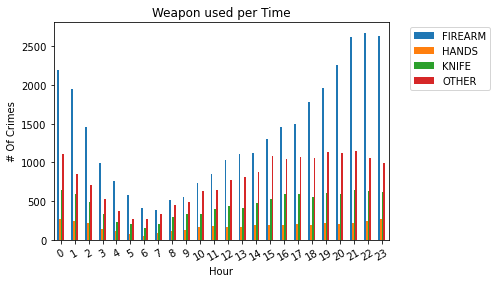

In [30]:
#Lets see if there are patterns for weapon based on time
weapon_time_df = create_counts_df("CrimeTime", "Weapon")

ax = weapon_time_df.pivot(index='CrimeTime', columns='Weapon').plot(kind='bar', title="Weapon used per Time", ylabel="# Of Crimes", xlabel="Hour", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARM', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Based on the visulaization, it looks like the times do indeed have an impact on the weapon type used.  The biggest takeaway looks to be that firearms are used more in the later hours of the night.  Take a look at the hours 15-23 - the level of crimes for using hands, knife, and other remain relatively constant but the use of firearms increases dramatically during this time frame.  This shows that after dark, it is more likely that a firearm may be used and police should be aware of this trend to be prepared for potential crimes involving firearms at that time.  We certainly will want to be aware that the time looks to have an impact on weapon used and add it into our model used to predict the weapon type.

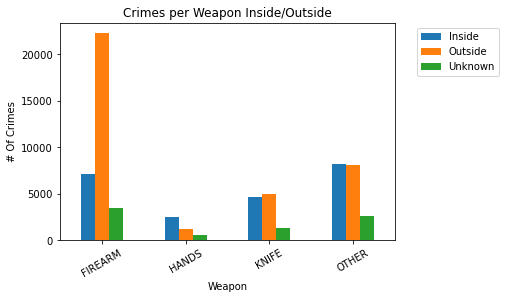

In [31]:
#Lets see if there are patterns for weapon based on inside/outside
weapon_I_O_df = create_counts_df("Weapon", "InsideOutside")

ax = weapon_I_O_df.pivot(index='Weapon', columns='InsideOutside').plot(kind='bar', title="Crimes per Weapon Inside/Outside", ylabel="# Of Crimes", xlabel="Weapon", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['Inside', 'Outside', 'Unknown']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Next, we analyze the trends of crimes inside vs. outside based on the weapon used.  From the visualization we see that when a firearm is used, it is more often than not used outside.  On the other hand, when hands are used it is more often than not used inside.  So, if police get reports of a shooting, there is a higher likelihood that they should be looking for the suspect outdoors.  If there is a report of a crime involving hands, they should be more prepared to handle and indoors crime.  This also says that if an officer is on duty outside, they should be better prepared for a shooting than officers inside - police more suited for shootings should be placed on duty in the outdoors.  This is important, because with shootings the severity of the crime may be escalated to a life or death situation and repsonding well to these could save lives.

The results from this exploratin show that including whether the crime happened inside or outside appears to have an impact on the weapon used and we will want to include inside/outside in our model.

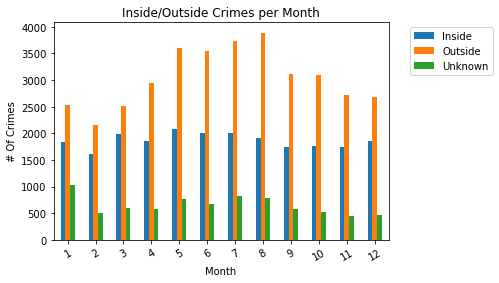

In [32]:
#Great, now lets see if there are patterns for inside/outside based on month of year
month_df = create_counts_df("CrimeDate", "InsideOutside")

ax = month_df.pivot(index='CrimeDate', columns='InsideOutside').plot(kind='bar', title="Inside/Outside Crimes per Month", ylabel="# Of Crimes", xlabel="Month", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['Inside', 'Outside', 'Unknown']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Now that we know whether a crime is inside/outside does appear to have an effect on the weapon type used, we can explore if the time of year has a relationship with the level of crimes inside/outside.

The data proves that depending on the time of year, they should be more prepared to stop crimes inside vs. outside.  For the warmer months of 4-11 (April - November) the number of crimes outside is higher than those inside.  For the other colder months of 12-3 (December - March) crimes inside vs. outside tend to have about the same or higher likelihood to be inside as they do outside.  The conclusion to be drawn here is that police should expect less crime outside during the colder months, and focus more resources on preventing the outside crime in the warmer months of the year.

With this, it may be useful to include the month in our model as if the crime was commited in a warmer month it may be useful to know.  If more crimes are known to happen outside in the summer months, it may lead to more FIREARMS being used in the summer months as well.

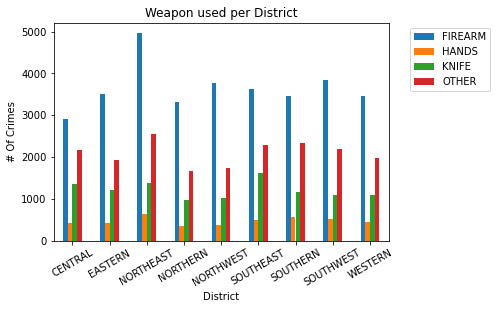

In [33]:
#Lets see if there are patterns for weapon based on District
weapon_district_df = create_counts_df("District", "Weapon")

ax = weapon_district_df.pivot(index='District', columns='Weapon').plot(kind='bar', title="Weapon used per District", ylabel="# Of Crimes", xlabel="District", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARM', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

The goal with this visualization is to determine whether or not there is a trend between district and the weapon used.  For example, do firearms tend to be used more frequently in the souther district as opposed to the western?  The data shows that each district looks about even in their distribution of weapon used.  None of them really stick out, the northeast has the highest usage of firearms by far, but they also have more crime in general with the other weapons as well (perhaps the northeast district is larger and hence results in more crime).  The conclusion here is that police in all districts should be able to handle all of these types of crime and the type of crime that occurs does not really depend on the district.

This conclusion tells us that the district may not have a huge impact on our ability to predict what weapon was used.  We may experiment with it in our model, but it may be a feature to leave out.

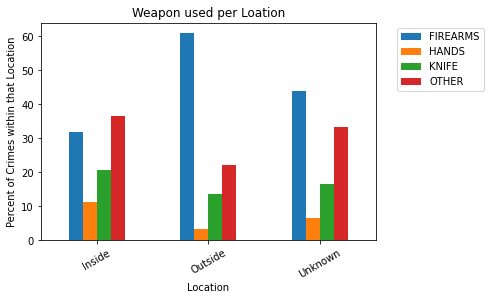

In [34]:
#Lets see if there are patterns for weapon based on InsideOutside
I_O_weapon_df = create_counts_df("InsideOutside", "Weapon")
#First tried with including 'None' but too many are 'None' to see the other distributions
I_O_weapon_df = I_O_weapon_df[I_O_weapon_df.Weapon != 'None']

#get some percentages, counts are less relevant, given inside/oustide what pct of crimes use that weapon?
#of the crimes that happen inside:
sum_outside = I_O_weapon_df[I_O_weapon_df.InsideOutside == 'Outside']['Count'].sum()
sum_inside = I_O_weapon_df[I_O_weapon_df.InsideOutside == 'Inside']['Count'].sum()
sum_unknown = I_O_weapon_df[I_O_weapon_df.InsideOutside == 'Unknown']['Count'].sum()

def generate_pcts(I_O_weapon_df):
    pcts = []
    for index, row in I_O_weapon_df.iterrows():
        if(row['InsideOutside'] == "Inside"):
            pcts.append((row["Count"]/sum_inside)*100)
        elif(row['InsideOutside'] == "Outside"):
            pcts.append((row["Count"]/sum_outside)*100)
        else:
            pcts.append((row["Count"]/sum_unknown)*100)
    return pcts

I_O_weapon_df['pcts'] = generate_pcts(I_O_weapon_df)

ax = I_O_weapon_df.pivot(index='InsideOutside', columns='Weapon', values='pcts').plot(kind='bar', title="Weapon used per Loation", ylabel="Percent of Crimes within that Location", xlabel="Location", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARMS', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Building off the previous finding that firearms tend to be used outside, this time we look at the percentages of weapon used based on the location of inside vs. outside.  These findings agree with our previous findings.  Given that a crime is outside, over 60% of the time, a firearm was used, whereas a knife ~15% of the time, and hands ~5% of the time.  On the other hand, when a crime is commited inside, a firearm was used roughly 33% of the time, knife ~20% and hands ~10%.  Police should have these numbers in mind when stationed to spot crime to know what is likely to happen given the location/scenario they are in.

Here I show some more descriptive statistics to re-enforce the fact that the location of the crime does have an affect on the weapon type used.

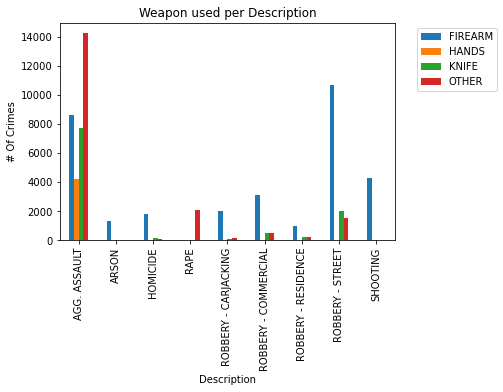

In [35]:
#Lets see if there are patterns for weapon based on description
description_weapon_df = create_counts_df("Description", "Weapon")

ax = description_weapon_df.pivot(index='Description', columns='Weapon').plot(kind='bar', title="Weapon used per Description", ylabel="# Of Crimes", xlabel="Description", rot=90)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARM', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

For the description of each crime, we can see the distribution of each weapon used.  The conclusion is that police will be able to know what weapon, if any, is likely to have been used or to be used given a particular crime took or might take place in the future.  The description of the crime clearly has an impact on the type of weapon that is being used - so we will definitely want to include it in our model.

# Feature Engineering

To get the data ready to use in the models I will do some feature engineering first.

# Modeling

# Results and Discussion

One of the challenges to exploring this data is finding trends that are specific down to a specific premise or address.  There are so many unique premises and addresses that analyzing each and everyone of these situations is difficult.  Though it may be more difficult to visualize and analyze, the results can still be extremely helpful to police.  Having the likelihood of each crime available given a premise is available, and a police officer would have that information readily available upon request.

# Conclusion and Summary

Each question was answered through analysis of the data. In summary:
* There is a trend between the time of day and the number of crimes, with the minimum amounts of crime happening between 4am and 6am, rising relatively steadily throughout the day and then hits a maximum around 4pm with the number remaining higher through roughly 10pm, and another little spike around mindnight (12am/ hour 0).  In general crimes tend to peak when the highest number of people are out and about.
* There is a trend between time of day and weapon used - the biggest takeaway is that firearms are used more in the later hours of the night.
* There is a trend between month of the year/season and the number of crimes - warmer months tend to have more crime.  As more people tend to stay put and indoors in the colder months, less crime takes place.
* There is not a deliberate trend between day of the week and crime - if anything, slightly more crime happens during the week and we say that this may be due to the fact that Baltimore may be higher populated during the week as all the business professionals work weekdays.
* There is a pattern in the number of crimes inside vs. outside based on the time of year - in the warmer months more crimes take place outside; in the colder months, more crime tends to take place indoors.
* There is a pattern in the location of the crime based on the weapon used. When a firearm is used, it is more often than not used outside. On the other hand, when hands are used it is more often than not used inside.  So, police should be aware of this fact and understand when a call for a shooting comes in, it is likely an outdoor act.
* There is a pattern in the location (inside vs. outside) and the weapon used - given that a crime is outside, over 60% of the time, a firearm was used, whereas a knife ~15% of the time, and hands ~5% of the time. On the other hand, when a crime is commited inside, a firearm was used roughly 33% of the time, knife ~20% and hands ~10%. Police should have these numbers in mind when stationed to spot crime to know what is likely to happen given the location/scenario they are in.
* There is not a distinct pattern in the weapon used based on district - each district has a relatively similar distribution of weapons used, and police of all types should exist in all districts.
* For the description of each crime, we can see the distribution of each weapon used.  The conclusion is that police will be able to know what weapon, if any, is likely to have been used or to be used given a particular crime took or might take place in the future.

The possibilities for exploration of this dataset are endless, these are some of the trends I saw as most important for police officers.  Continued exploration could involve setting up a chat with an officer to determine what trends and analysis would actually be most helpful to them.

# Limitations and Future Work

# References and Contributions